### Goals of tutorial
* feature jupyter as much as possible
* cover useful concepts related to nlp
* showcase core spacy capabilities
* showcase spacy integrations with other libs

### Before Running:
* Use python 3 to leverage the nbagg backend
* enable js widgets via `jupyter nbextension enable --py widgetsnbextension`.
    * ideally this would be with -sys-prefix but without is OK.

In [3]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [1]:
!pip install skater

  Using cached skater-1.0.0b.6.tar.gz
  Using cached scikit_learn-0.18.1-cp27-cp27mu-manylinux1_x86_64.whl
    100% |████████████████████████████████| 22.3MB 28kB/s  eta 0:00:01
    100% |████████████████████████████████| 256kB 5.0MB/s eta 0:00:01
    100% |████████████████████████████████| 563kB 1.2MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 11.2MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 11.3MB/s ta 0:00:01
    100% |████████████████████████████████| 491kB 3.0MB/s eta 0:00:01
  Using cached numpy-1.12.1-cp27-cp27mu-manylinux1_x86_64.whl
    99% |████████████████████████████████| 45.0MB 85.5MB/s eta 0:00:01Killed


In [11]:
!pip install spacy
#!python -m spacy download en


In [ ]:
#!pip3 install spacy
#!python3 -m spacy download en
import spacy
nlp = spacy.load('en',parse=False, tag=False,entity=False)

<IPython.core.display.Javascript object>


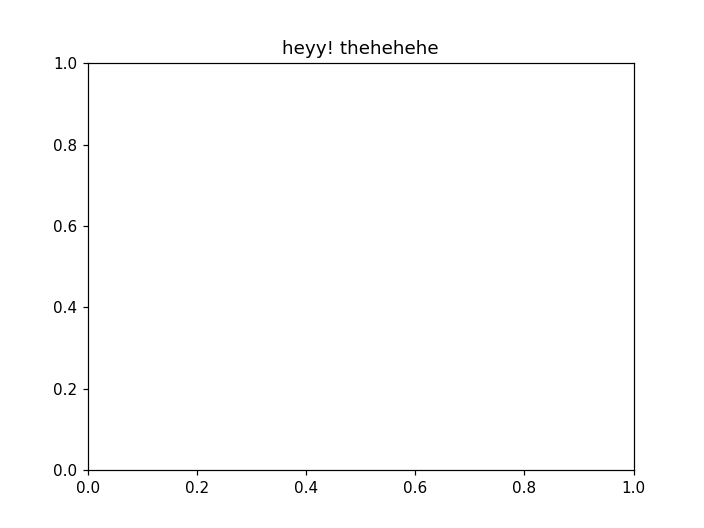

In [2]:
%matplotlib notebook
from ipywidgets import Layout, Button, Text
from IPython.display import display
from IPython.display import clear_output
import matplotlib.pyplot as plt

class TextApp(object):
    def __init__(self):

        self.text_box = Text()
        self.run_button = Button(description="Run Model")
        self.run_button.on_click(self.on_button_clicked)
        display(self.run_button)
        display(self.text_box)        
        self.ax = None
        self.f = None
        
    def on_button_clicked(self, b):
        #clear_output()
        if self.ax is None:
            self.f, self.ax = plt.subplots(1)
        #self.ax.set_title(self.text_box.value)
        plt.title(self.text_box.value)
        plt.show()

app = TextApp()

In [3]:
1

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
